### Scikit-learn Agglomerative Clustering

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

iris = load_iris() # We will use the iris dataset without its labels
X = iris.data[:, 2:]
X_scaled = scale(X) # Scaling the data is useful when we are going to calculate a similarity/distance matrix between instances

In this example we will four three agglomerative clustering models: each one based on a different linkage policy for measuring the distance between clusters.
In all the models, we choose the euclidean distance as the distance metric.

Single linkage (nearest neighbor linkage) determines the distance between two clusters as the shortest distance between any two points in the two clusters. This method tends to produce long, chain-like clusters that are sensitive to outliers and noise in the data.

In [41]:
from sklearn.cluster import AgglomerativeClustering

modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'single',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_single.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,0
,compute_distances,False


Complete linkage (farthest neighbor linkage) determines the distance between two clusters as the longest distance between any two points in the two clusters. This method tends to produce compact, spherical clusters that are less sensitive to outliers and noise in the data.



In [42]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


Average linkage determines the distance between two clusters as the average distance between all pairs of points in the two clusters. This method tends to produce clusters that are somewhere between the long, chain-like clusters produced by single linkage and the compact, spherical clusters produced by complete linkage.

In [43]:
modelo_hclust_average = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,0
,compute_distances,False


Ward linkage (minimum variance linkage) determines the distance between two clusters by minimising the increase in variance when the two clusters are merged. This method tends to produce clusters that have similar variances and sizes.

In [44]:
modelo_hclust_ward = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


Visualize the three model dendrograms to observe the cluster hierarchies created

In [45]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Don't worry, you don't need to learn this manually defined method, we will simply call it three times later
    # because it will help us visualizing the dendrograms we learnt.

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

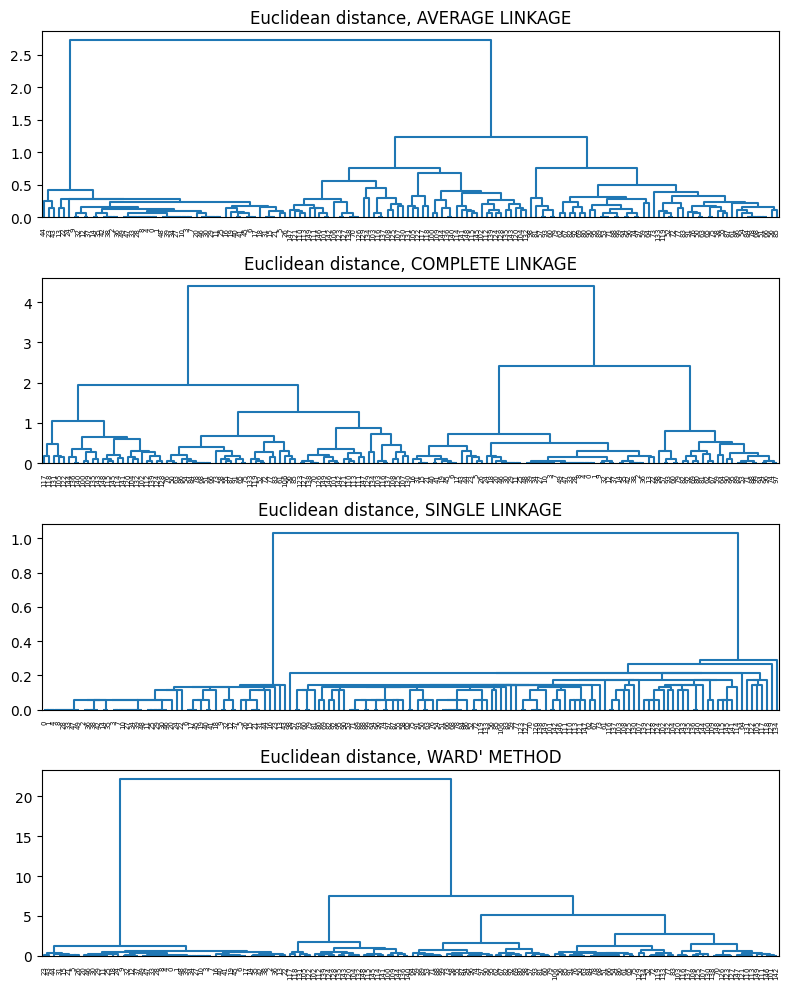

In [46]:
fig, axs = plt.subplots(4, 1, figsize=(8, 10))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Euclidean distance, AVERAGE LINKAGE")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Euclidean distance, COMPLETE LINKAGE")
plot_dendrogram(modelo_hclust_single, color_threshold=0, ax=axs[2])
axs[2].set_title("Euclidean distance, SINGLE LINKAGE")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[3])
axs[3].set_title("Euclidean distance, WARD' METHOD")
plt.tight_layout();

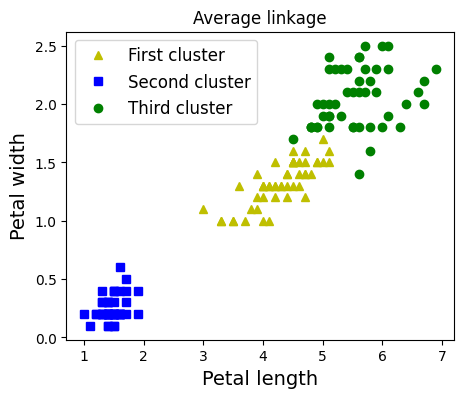

In [47]:
modelo_hclust_average = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'average',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_average.fit_predict(X_scaled)

# Visualization of the resulting clusters
plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Average linkage")
plt.show()

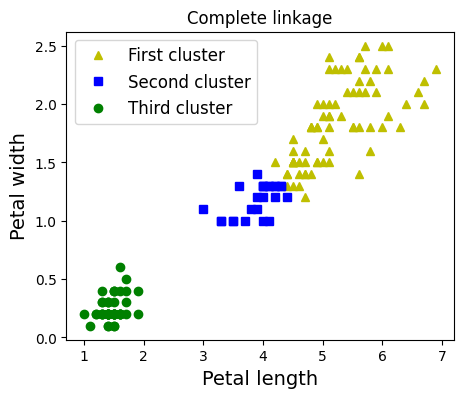

In [48]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'complete',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_complete.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Complete linkage")
plt.show()

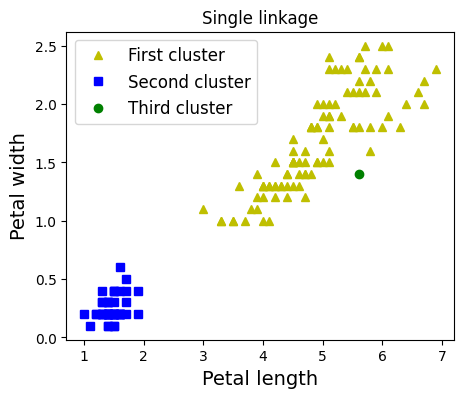

In [49]:
modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'single',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Single linkage")
plt.show()

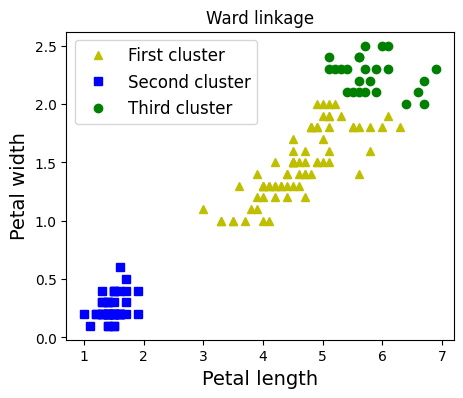

In [50]:
modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'ward',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Ward linkage")
plt.show()

### Agglomerative Clustering from scratch

In [51]:
import numpy as np

class AgglomerativeClusteringScratch:
  def __init__(self, n_clusters=None, linkage='average'):
    # Use euclidean matric for computing pairwise distance matrix
    self.n_clusters = n_clusters

    if linkage == 'complete':
      self.linkage_distance_func = self.max_linkage_distance
    elif linkage == 'single':
      self.linkage_distance_func = self.min_linkage_distance
    elif linkage == 'average':
      self.linkage_distance_func = self.avg_linkage_distance
    elif linkage == 'ward':
      self.linkage_distance_func = self.ward_method_distance

  def avg_linkage_distance(self, cluster_A, cluster_B):
    # Compute average linkage distance between two clusters
    distance = 0
    for i in range(cluster_A.shape[0]):
      distance += np.linalg.norm(cluster_B - cluster_A[i, :], axis=1).sum()
    distance /= (cluster_A.shape[0] * cluster_B.shape[0])
    return distance

  def max_linkage_distance(self, cluster_A, cluster_B):
    # Compute maximum linkage distance between two clusters
    distance = 0
    for i in range(cluster_A.shape[0]):
      distance = np.append(np.linalg.norm(cluster_B - cluster_A[i, :], axis=1), distance).max()
    return distance

  def min_linkage_distance(self, cluster_A, cluster_B):
    # Compute minimum linkage distance between two clusters
    distance = np.inf
    for i in range(cluster_A.shape[0]):
      distance = np.append(np.linalg.norm(cluster_B - cluster_A[i, :], axis=1), distance).min()
    return distance

  def ward_method_distance(self, cluster_A, cluster_B):
    # Compute the Ward linkage distance between two clusters
    n_A = cluster_A.shape[0]
    n_B = cluster_B.shape[0]

    centroid_A = np.mean(cluster_A, axis=0)
    centroid_B = np.mean(cluster_B, axis=0)

    # Distance is proportional to the squared Euclidean distance between centroids
    # scaled by size of the clusters
    diff = centroid_A - centroid_B
    distance = (n_A * n_B) / (n_A + n_B) * np.dot(diff, diff)

    return distance

  def pairwise_distance(self, data, n_samples):
    # Compute the pairwise distance matrix in euclidean matric
    distance_mat = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(i + 1, n_samples):
        distance = np.linalg.norm(data[i] - data[j])
        distance_mat[i, j] = distance
        distance_mat[j, i] = distance
    return distance_mat

  def update(self, data, distance_mat, labels):
      #"Find closest clusters, merge clusters, delete cluster, update distance"
      idx_upper = np.triu_indices(distance_mat.shape[0], k=1)  # Index of upper part of distance matrix (skip diagonal)
      min_value = np.min(distance_mat[idx_upper])  # Value of idx_upper
      row, col = np.argwhere(distance_mat == min_value)[0]  # Index of min_value (same as d_kl)

      # Update label
      labels[labels == col] = row
      labels[labels > col] -= 1

      # Deleted the row and column 'col'
      distance_mat = np.delete(distance_mat, col, 0)
      distance_mat = np.delete(distance_mat, col, 1)

      # Update distance matrix
      for i in range(len(distance_mat)):
          distance_mat[row, i] = self.linkage_distance_func(data[labels == row], data[labels == i])
          distance_mat[i, row] = distance_mat[row, i]
      return distance_mat, labels

  def fit_predict(self, X):
    self.data = X
    self.n_samples = self.data.shape[0]
    self.initial_distance = self.pairwise_distance(self.data, self.n_samples)
    self.labels = np.arange(self.n_samples)
    self.distance_matrix = self.initial_distance.copy()
    while len(np.unique(self.labels)) > self.n_clusters:
      # Fill in the diagonal as infinity to determine that the distance is the same position.
      np.fill_diagonal(self.distance_matrix, np.inf)
      self.distance_matrix, self.labels = self.update(self.data, self.distance_matrix, self.labels)

    return self.labels

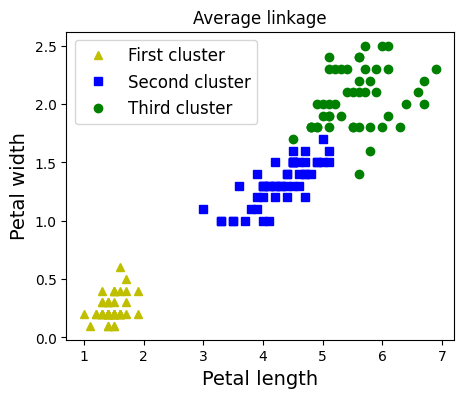

In [52]:
ACS_avg = AgglomerativeClusteringScratch(n_clusters=3, linkage='average')
y_pred = ACS_avg.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Average linkage")
plt.show()

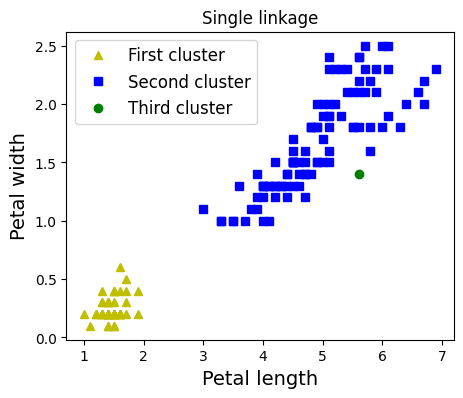

In [53]:
ACS_single = AgglomerativeClusteringScratch(n_clusters=3, linkage='single')
y_pred = ACS_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Single linkage")
plt.show()

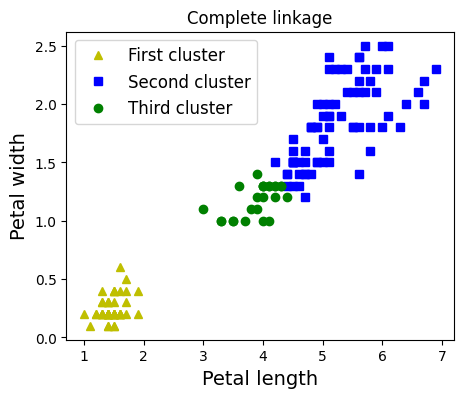

In [54]:
ACS_comp = AgglomerativeClusteringScratch(n_clusters=3, linkage='complete')
y_pred = ACS_comp.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Complete linkage")
plt.show()

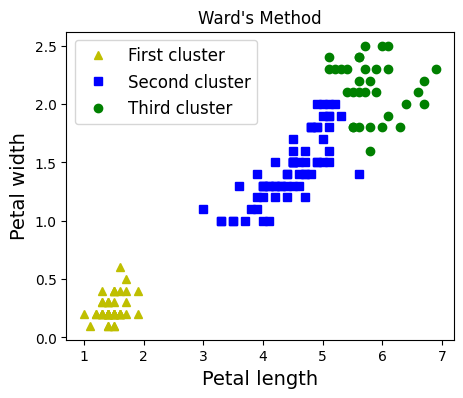

In [55]:
ACS_ward = AgglomerativeClusteringScratch(n_clusters=3, linkage='ward')
y_pred = ACS_ward.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Ward's Method")
plt.show()

### Agglomerative Clustering usage on the penguins dataset

In [56]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
folder_path = path
print(os.listdir(folder_path))

csv_path = os.path.join(folder_path, 'penguins_size.csv') # เลือก penguins_size.csv
penguins = pd.read_csv(csv_path).dropna()

X = penguins.drop(['species','island','sex'], axis=1)
y = penguins.species.astype('category').cat.codes
print(y.unique())

penguins

['penguins_size.csv', 'penguins_lter.csv']
[0 1 2]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X).iloc[:, :4]
X_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.897653,0.783487,-1.429521,-0.571229
1,-0.824290,0.121896,-1.072408,-0.509011
2,-0.677564,0.427246,-0.429605,-1.193405
4,-1.337831,1.088836,-0.572450,-0.944535
5,-0.860972,1.750427,-0.786718,-0.695664
...,...,...,...,...
338,0.587947,-1.761093,0.927425,0.890886
340,0.514584,-1.455743,0.998847,0.797560
341,1.174851,-0.743261,1.498806,1.917477
342,0.221132,-1.201285,0.784580,1.233083


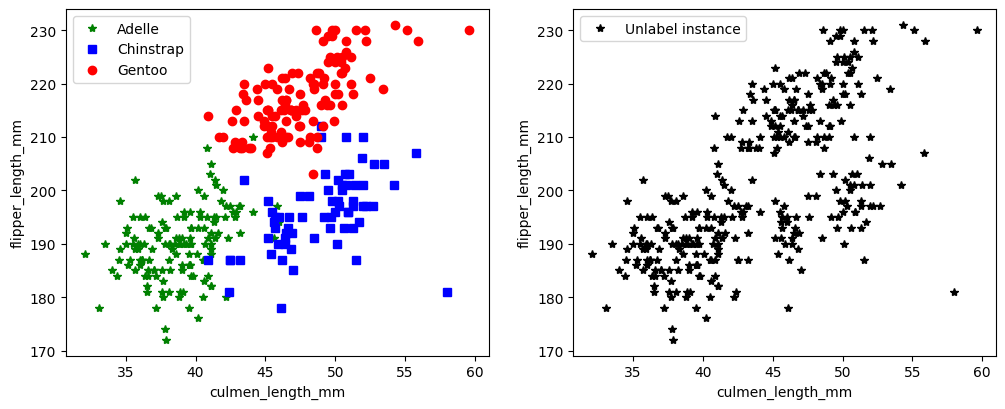

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
plt.subplot(122,)
plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
plt.show()

### Average linkage example

In [59]:
agg_clust_avg = AgglomerativeClustering(metric='euclidean', linkage='average', n_clusters=3)  #3 kinds of penguins
X_avg = X.copy(deep=True)
X_avg['cluster'] = agg_clust_avg.fit_predict(X_scaled)
# X_avg

In [60]:
print(agg_clust_avg.feature_names_in_)
print(agg_clust_avg.n_leaves_)

['culmen_length_mm' 'culmen_depth_mm' 'flipper_length_mm' 'body_mass_g']
334


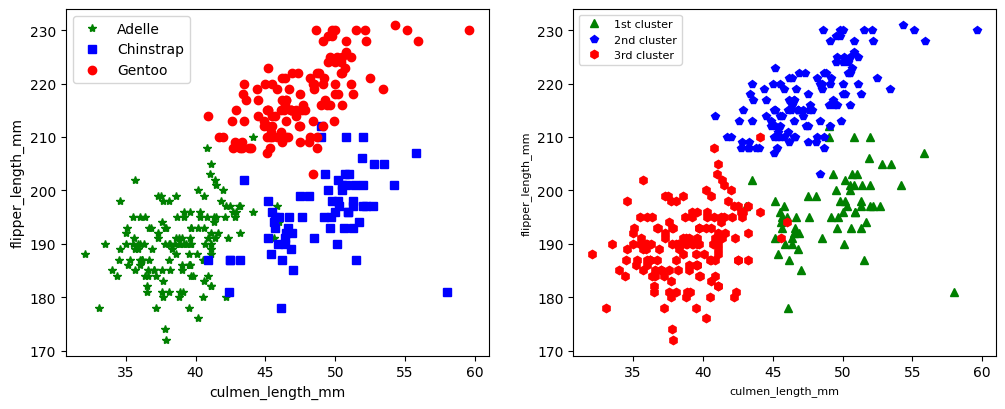

In [61]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_avg['cluster']==0]['culmen_length_mm'], X[X_avg['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_avg['cluster']==1]['culmen_length_mm'], X[X_avg['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_avg['cluster']==2]['culmen_length_mm'], X[X_avg['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

### Complete linkage example

In [62]:
agg_clust_cmp = AgglomerativeClustering(metric='euclidean', linkage='complete', n_clusters=3)  #3 kinds of penguins
X_cmp = X.copy(deep=True)
X_cmp['cluster'] = agg_clust_cmp.fit_predict(X_scaled)
# X_cmp

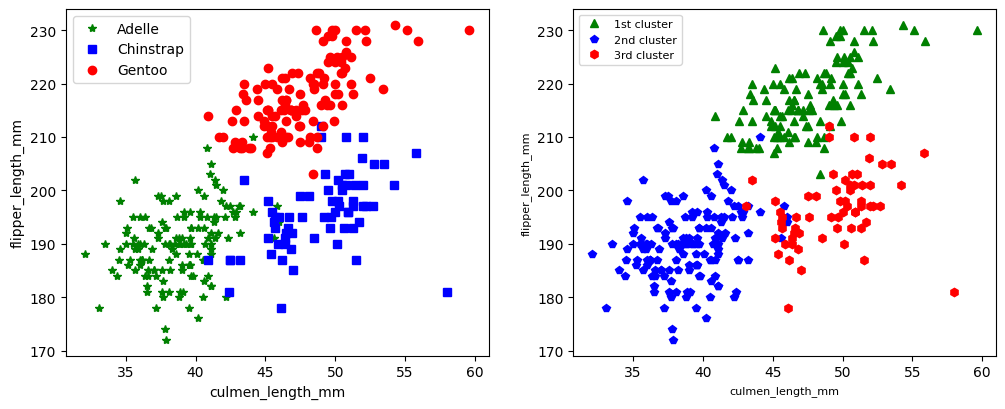

In [63]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_cmp['cluster']==0]['culmen_length_mm'], X[X_cmp['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_cmp['cluster']==1]['culmen_length_mm'], X[X_cmp['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_cmp['cluster']==2]['culmen_length_mm'], X[X_cmp['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

### Ward's method example

In [64]:
agg_clust_wrd = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=3)  #3 kinds of penguins
X_wrd = X.copy(deep=True)
X_wrd['cluster'] = agg_clust_wrd.fit_predict(X_scaled)
# X_wrd

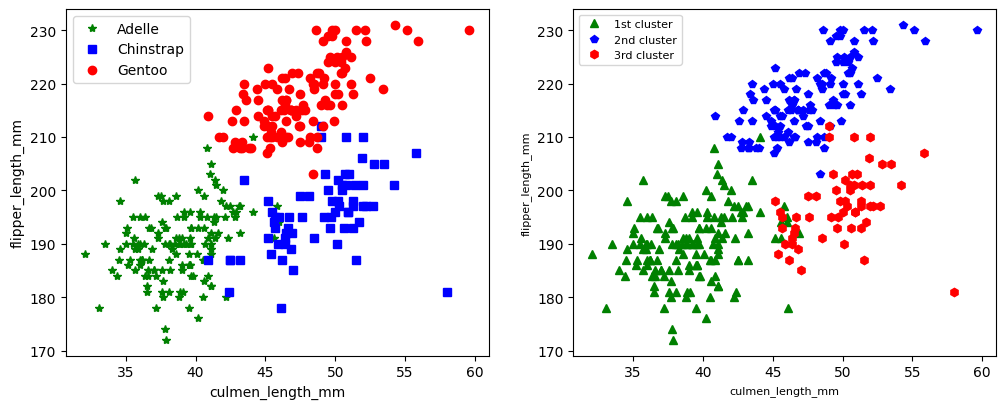

In [65]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_wrd['cluster']==0]['culmen_length_mm'], X[X_wrd['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_wrd['cluster']==1]['culmen_length_mm'], X[X_wrd['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_wrd['cluster']==2]['culmen_length_mm'], X[X_wrd['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

----
# Homework

จาก Fish dataset ที่กำหนด จงสังเกตและทดลองใช้ Agglomerative Clustering เพื่อทำแบ่งประเภทชนิดของปลาจากข้อมูลที่มีอยู่ให้ได้ผลลัพธ์ออกมา **เหมาะสมที่สุด** และสรุปผลดังนี้

1. แปลงข้อมูลแบบลดขนาด (PCA) เพื่อเทียบข้อมูลก่อนและหลังวิเคราะห์ส่วนประกอบพื้นฐาน
2. จากกการ plot ภาพข้อมูล Fish dataset แบบ Unlabel นักศึกษาคิดว่าจำนวน Cluster ที่ **เหมาะสมที่สุด** สำหรับ Dataset นี้คือเท่าใด
3. ทดลองใช้ Agglomerative Clustering (n_clusters ตามที่เลือกในข้อ 1) และเลือกปรับ linkage เป็นดังนี้ ['single', 'complete', 'average', 'ward'] แล้วบันทึกภาพผลลัพธ์การทำ Clustering
4. จงสรุปว่า linkage ที่ **เหมาะสมที่สุด** สำหรับการทำ Clustering สำหรับ Dataset นี้คือประเภทใด


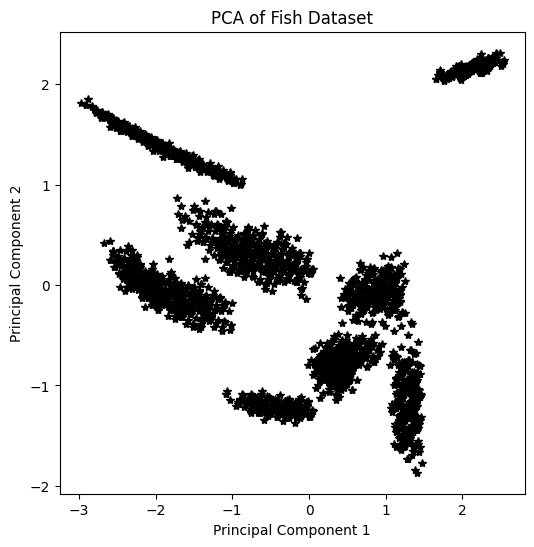

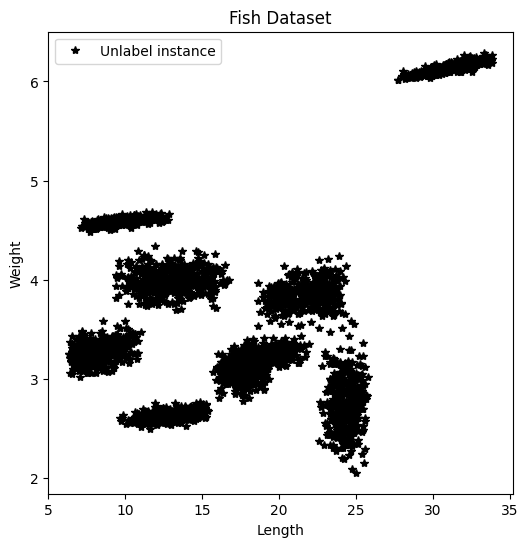

InvalidParameterError: The 'linkage' parameter of AgglomerativeClustering must be a str among {'average', 'single', 'ward', 'complete'}. Got 'replace with linkages of your choice' instead.

In [66]:
# ---preprocessing and PCA---
X = fish.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.plot(pca[:,0], pca[:,1], "k*", label="Unlabel instance")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Fish Dataset")
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(X.iloc[:,0], X.iloc[:,1], "k*", label="Unlabel instance")
plt.xlabel("Length", fontsize=10)
plt.ylabel("Weight", fontsize=10)
plt.legend(fontsize=10)
plt.title("Fish Dataset")
plt.show()
# -------------

def plot_two_pca_component(pca_data, labels, title='PCA of Dataset'):
  plt.figure(figsize=(6, 6))
  n_labels = len(np.unique(labels))
  color = iter(plt.cm.plasma(np.linspace(0, 1, n_labels)))
  for i in range(n_labels):
      mask = (labels == i)
      c = next(color)
      plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")

  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.title(title)
  plt.legend(fontsize=10)
  plt.show()

def plot_first_two_column(data, labels, title='Dataset', xlabel="Data 1", ylabel="Data 2"):
  plt.figure(figsize=(6, 6))
  n_labels = len(np.unique(labels))
  color = iter(plt.cm.rainbow(np.linspace(0, 1, n_labels)))
  for i in range(n_labels):
      mask = (labels == i)
      c = next(color)
      plt.scatter(data.iloc[mask, 0], data.iloc[mask, 1], c=c, label=f"Cluster: {i}")

  plt.xlabel(xlabel, fontsize=10)
  plt.ylabel(ylabel, fontsize=10)
  plt.title(title)
  plt.legend(fontsize=10)
  plt.show()


n_clusters = '''replace with the appropriate number of clusters'''
linkage = '''replace with linkages of your choice'''
agg_clust = AgglomerativeClustering(metric='euclidean', linkage=linkage, n_clusters=n_clusters)
y_pred = agg_clust.fit_predict(pca)


# --- Define by urself ---
# ...
# ...
# plot clustering
# ...
# ...

In [67]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("taweilo/fish-species-sampling-weight-and-height-data")

print("Path to dataset files:", path)
fish = pd.read_csv(os.path.join(path, 'fish_data.csv'))


Path to dataset files: /Users/7n100489/.cache/kagglehub/datasets/taweilo/fish-species-sampling-weight-and-height-data/versions/3


In [68]:
len(fish['species'].unique())

9

1. แปลงข้อมูลแบบลดขนาด (PCA) เพื่อเทียบข้อมูลก่อนและหลังวิเคราะห์ส่วนประกอบพื้นฐาน

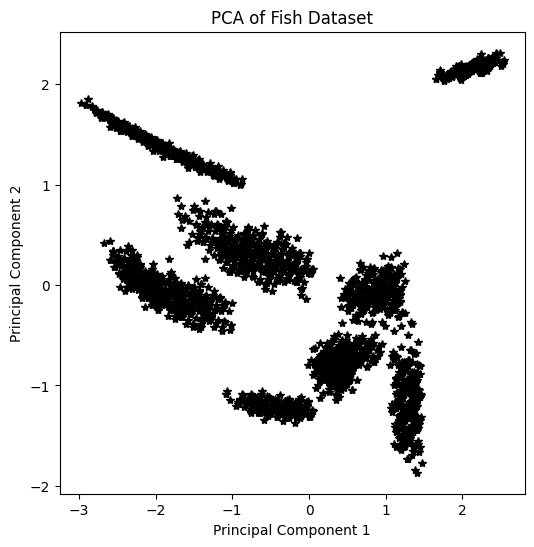

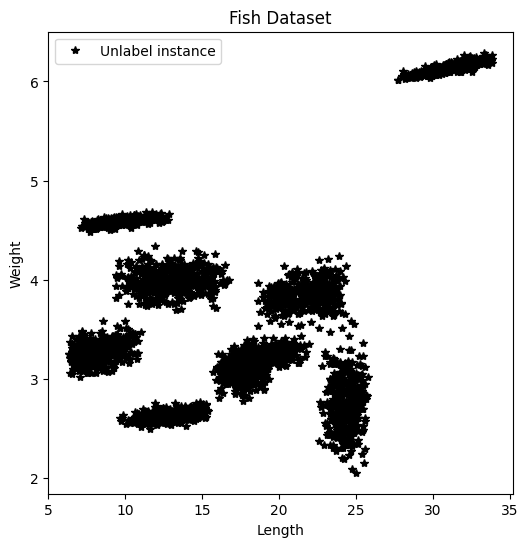

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

X = fish.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.plot(pca[:,0], pca[:,1], "k*", label="Unlabel instance")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Fish Dataset")
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(X.iloc[:,0], X.iloc[:,1], "k*", label="Unlabel instance")
plt.xlabel("Length", fontsize=10)
plt.ylabel("Weight", fontsize=10)
plt.legend(fontsize=10)
plt.title("Fish Dataset")
plt.show()
# -------------

2. จากกการ plot ภาพข้อมูล Fish dataset แบบ Unlabel นักศึกษาคิดว่าจำนวน Cluster ที่ **เหมาะสมที่สุด** สำหรับ Dataset นี้คือเท่าใด

ตอบ จากการมองกราฟ จะพบว่า มีข้อมูลแบ่งเป็น 8 กลุ่มๆ

In [74]:
def plot_two_pca_component(pca_data, labels, title='PCA of Dataset'):
  plt.figure(figsize=(6, 6))
  n_labels = len(np.unique(labels))
  color = iter(plt.cm.plasma(np.linspace(0, 1, n_labels)))
  for i in range(n_labels):
      mask = (labels == i)
      c = next(color)
      plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")

  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.title(title)
  plt.legend(fontsize=10)
  plt.show()

def plot_first_two_column(data, labels, title='Dataset', xlabel="Data 1", ylabel="Data 2"):
  plt.figure(figsize=(6, 6))
  n_labels = len(np.unique(labels))
  color = iter(plt.cm.rainbow(np.linspace(0, 1, n_labels)))
  for i in range(n_labels):
      mask = (labels == i)
      c = next(color)
      plt.scatter(data.iloc[mask, 0], data.iloc[mask, 1], c=c, label=f"Cluster: {i}")

  plt.xlabel(xlabel, fontsize=10)
  plt.ylabel(ylabel, fontsize=10)
  plt.title(title)
  plt.legend(fontsize=10)
  plt.show()

3. ทดลองใช้ Agglomerative Clustering (n_clusters ตามที่เลือกในข้อ 1) และเลือกปรับ linkage เป็นดังนี้ ['single', 'complete', 'average', 'ward'] แล้วบันทึกภาพผลลัพธ์การทำ Clustering

/var/folders/bh/yxgmvcwn49390srvg5kl2d01f3vnyl/T/ipykernel_21587/623439917.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")


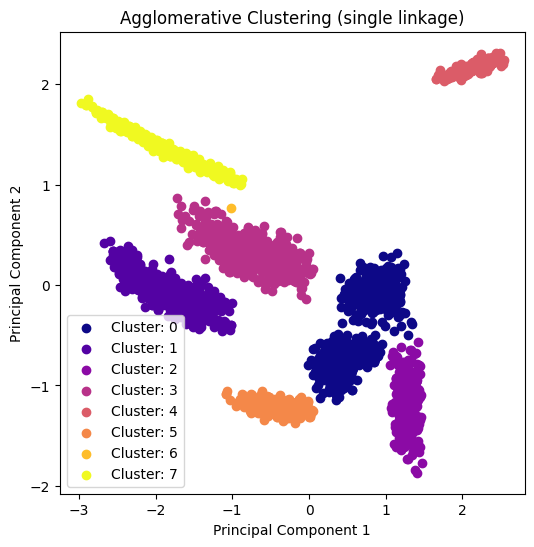

/var/folders/bh/yxgmvcwn49390srvg5kl2d01f3vnyl/T/ipykernel_21587/623439917.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")


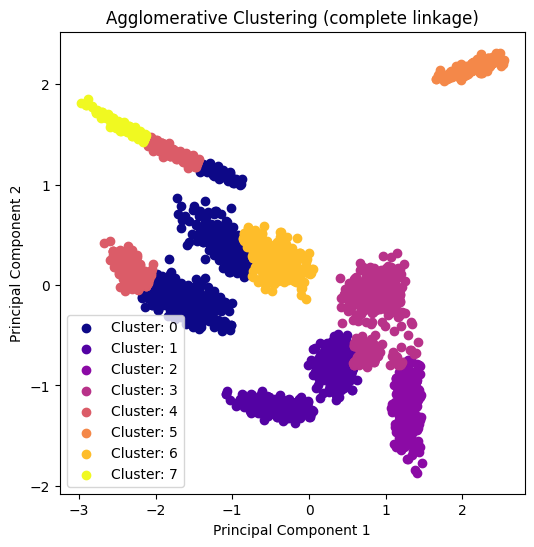

/var/folders/bh/yxgmvcwn49390srvg5kl2d01f3vnyl/T/ipykernel_21587/623439917.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")


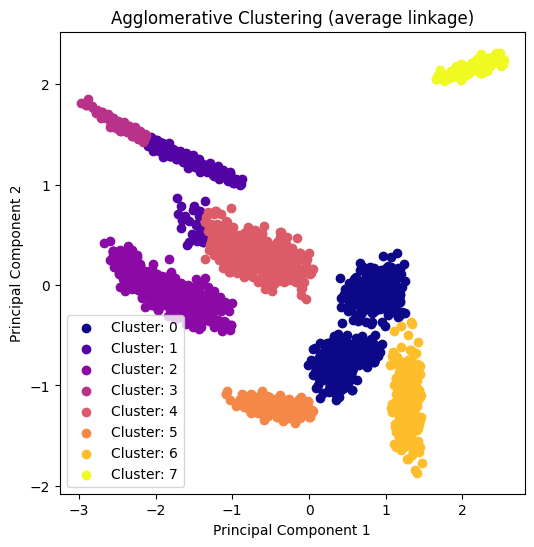

/var/folders/bh/yxgmvcwn49390srvg5kl2d01f3vnyl/T/ipykernel_21587/623439917.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=c, label=f"Cluster: {i}")


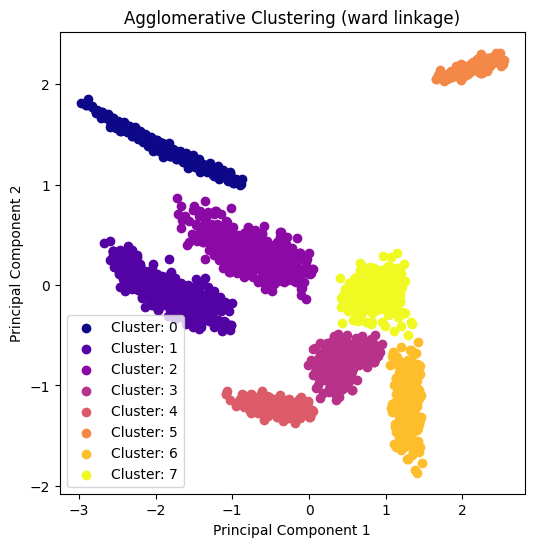

In [82]:
n_clusters = 8
linkages = ["single", "complete", "average", "ward"]
X_pca = pca[:, :2]

for link in linkages:
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    y_pred = agg_clust.fit_predict(X_scaled)  # หรือ X_pca ก็ได้
    plot_two_pca_component(
        X_pca, y_pred, title=f"Agglomerative Clustering ({link} linkage)"
    )

4. จงสรุปว่า linkage ที่ **เหมาะสมที่สุด** สำหรับการทำ Clustering สำหรับ Dataset นี้คือประเภทใด

ตอบ Ward เนื่องจากถ้าดูจากรูปกราฟที่ได้จะพบว่า Cluster มีความใกล้เคียงกับชนิดของปลามากที่สุด